In [25]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(0)


In [2]:
#Loading the dataset
dataset=pd.read_csv("gas_turbines.csv")
dataset.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
dataset.shape

(15039, 11)

11 columns and 15039 records. Target variable is Turbine energy yield(TEY).

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
#statistice of the data 
dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
dataset.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
dataset.duplicated().sum()

0

NO duplicated or null items

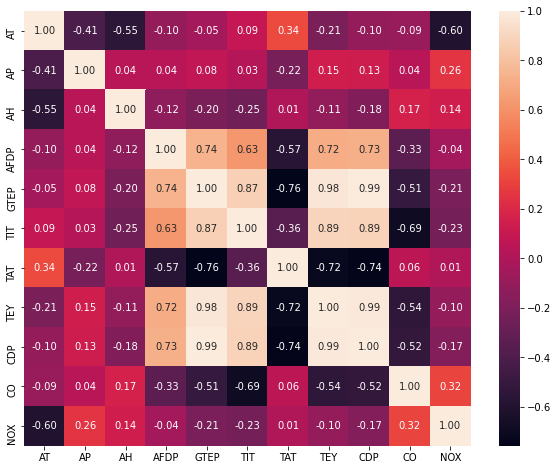

In [4]:
#correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')

We can see there are multiple features that are strongly correlated with each other. Let us deleted some gas turbine parameters and build the model on ambient variables.

In [5]:
#Remove gas turbine parameters
#Drop Compressor discharge pres, turbine inlet temp,gas turbine exhaust pres and turbine after temperature
cols=['CDP','TIT','GTEP','TAT','AFDP']
dataset=dataset.drop(cols,axis=1)

Consider only ambient variables to predict TEY.

In [6]:
dataset.head()

,AT,AP,AH,TEY,CO,NOX
0,6.8594,1007.9,96.799,114.70,3.1547,82.722
1,6.7850,1008.4,97.118,114.72,3.2363,82.776
2,6.8977,1008.8,95.939,114.71,3.2012,82.468
3,7.0569,1009.2,95.249,114.72,3.1923,82.670
4,7.3978,1009.7,95.150,114.72,3.2484,82.311


(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <a list of 10 Patch objects>)

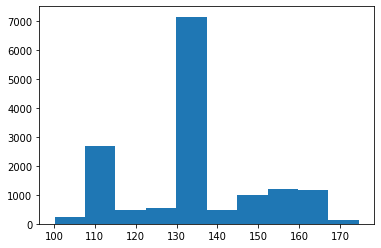

In [7]:
plt.hist(dataset['TEY'])



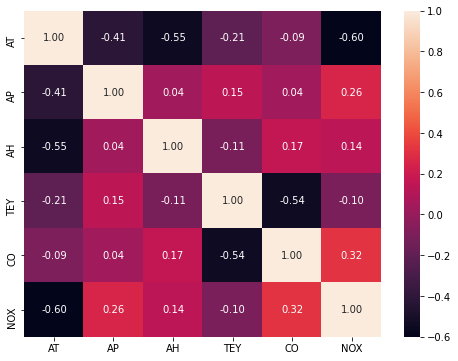

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')



*  Ambient temperature and Turbine energy yield are neagtively correlated. As the ambient temperature increases, TEY decreases.
*  Same with ambient humidity but it shows a weaker neagtive correlation.
*   TEY also has negative correlation with Carbon monoxide emissions.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


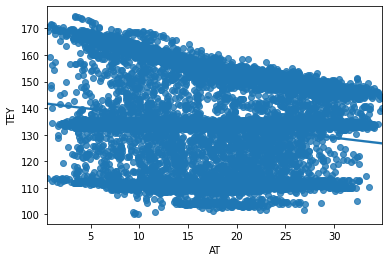

In [9]:
#Scatterplots
#AT and TEY
sns.regplot('AT','TEY',data=dataset)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


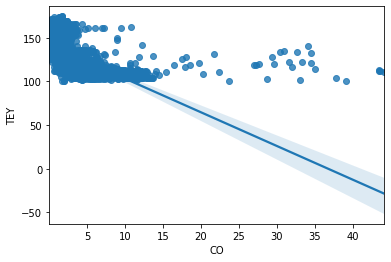

In [10]:
#CO and TEY
sns.regplot('CO','TEY',data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


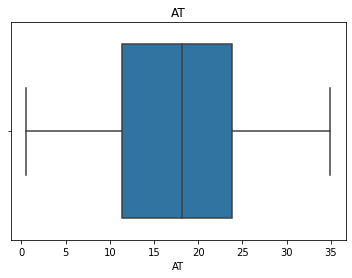

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


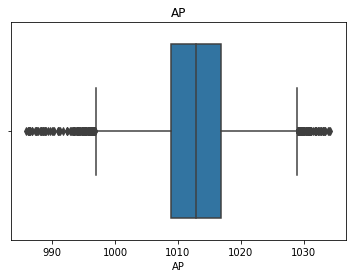

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


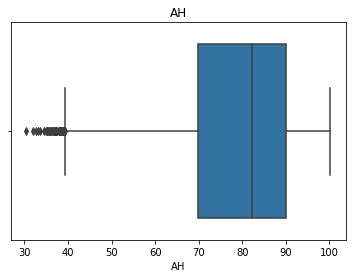

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


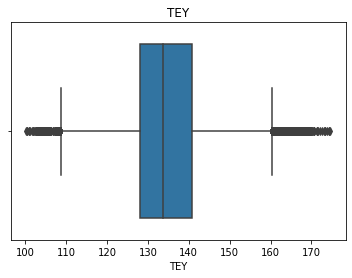

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


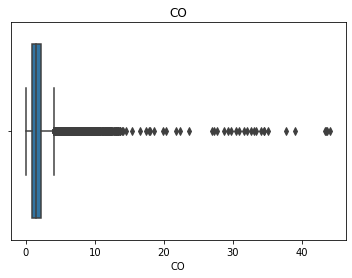

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


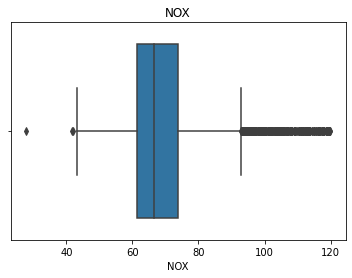

In [11]:
for col in dataset.columns:
  sns.boxplot(dataset[col])
  plt.title(col)
  plt.show()

Ambient temperature shows normal distribution. Other features have outliers in them. AH is left skewed and CO is right skewed

In [13]:
#Seperate the independent and target variables
X=dataset.drop(['TEY'],axis=1)
y=dataset['TEY'].values

In [14]:
X=np.array(X)

In [15]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
print('Shape of X_train {} \nShape of y_test {}\nShape of X_test {}\nShape of y_train{}'.format(X_train.shape,y_test.shape,X_test.shape,y_train.shape))

Shape of X_train (12031, 5) 
Shape of y_test (3008,)
Shape of X_test (3008, 5)
Shape of y_train(12031,)


In [17]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [18]:
y_train = mms.fit_transform(y_train.reshape(-1,1))

##ANN for regression

In [26]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [27]:
# create model
def create_regressor():
    regressor = Sequential()
    regressor.add(Dense(8, input_dim=5, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    adam=Adam(lr=0.01)
    regressor.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])
    return regressor

In [32]:
# Create the model
model = KerasRegressor(build_fn = create_regressor,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = regressor,param_grid = param_grid,scoring = 'neg_mean_squared_error',cv = KFold())
grid_result = grid.fit(X_train,y_train)

TypeError: ignored

In [31]:
# Create the model
model = KerasRegressor(build_fn = create_regressor,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = regressor,param_grid = param_grid,scoring = 'neg_mean_squared_error',cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

TypeError: ignored

I have constantly been getting this kind of error and unable to find the best parameters for the model.
Please help me with this error.

###Tuning of hyperparameters all at once

In [ ]:
def build_regressor(optimizer,units1,units2):
    regressor = Sequential()
    regressor.add(Dense(units=units1,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=units2,activation='relu',kernel_initializer='uniform'))
    regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    regressor.compile(optimizer=optimizer,loss='mean_squared_error',metrics=['mean_squared_error'])
    return regressor

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

regressor = KerasRegressor(build_fn=build_regressor)
parameters = {'batch_size':[10,20,40],
             'epochs':[10,50,100],
             'optimizer':['adam','rmsprop'],
             'units1':[6,8,12],
              'units2':[2,4,8]}

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
Epoch 37/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 38/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 39/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 40/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 41/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 42/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 43/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 44/50
401/401 [==============================] - 1s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 45/50
401/401 [==============================] - 1s 2ms

In [ ]:
def create_regressor(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    regressor = Sequential()
    regressor.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    regressor.add(Dropout(dropout_rate))
    regressor.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    regressor.add(Dropout(dropout_rate))
    regressor.add(Dense(1,activation = 'relu'))
    
    adam = Adam(lr = learning_rate)
    regressor.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mean_squared_error'])
    return regressor

# Create the model

regressor= KerasRegressor(build_fn = create_regressor,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [6,8,12]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = regressor,param_grid = param_grids,verbose = 10)
grid_result = grid.fit(X_train,y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2, score=-0.010, total= 1.1min
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2, score=-0.011, total=  11.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2, score=-0.252, total=  11.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2, score=-0.009, total=  11.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=2, score=-0.010, total=   9.5s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4, score=-0.248, total=   9.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.1min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4, score=-0.251, total=  11.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4, score=-0.010, total=  11.6s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.4min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4, score=-0.009, total=  11.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.6min remaining:    0.0s


[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=4, score=-0.011, total=  11.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=8, score=-0.009, total=   9.8s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=8, score=-0.010, total=  11.7s
[CV] activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6, neuron2=8 
[CV]  activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=6,

I have tried to tune all the hypermaters at once. But, inspite of running the code all day long, it would stop running in the google colab after some period of time. Therefore, I could not find the best params this way too.

Below I have built the ANN model withour considering best parameters and have got fair results.

In [52]:
regressor = Sequential()
regressor.add(Dense(units=8,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=4,activation='relu',kernel_initializer='uniform'))
regressor.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))

In [53]:
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [54]:
regressor.fit(X_train,y_train,epochs=500,batch_size=15)

Epoch 1/500
803/803 [==============================] - 2s 980us/step - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 2/500
803/803 [==============================] - 1s 991us/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 3/500
803/803 [==============================] - 1s 942us/step - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 4/500
803/803 [==============================] - 1s 1ms/step - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 5/500
803/803 [==============================] - 1s 1ms/step - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 6/500
803/803 [==============================] - 1s 985us/step - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 7/500
803/803 [==============================] - 1s 1ms/step - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 8/500
803/803 [==============================] - 1s 987us/step - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 9/500
803/803 [==============================] - 1s 1ms/step - loss: 0.0155 - mean_squared_error

Text(0, 0.5, 'loss')

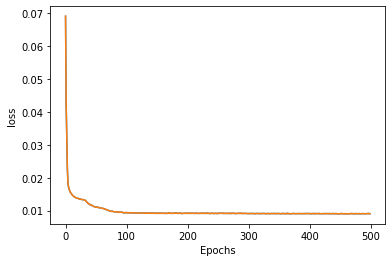

In [55]:
#Plot the losses
losses = regressor.history.history
losses = np.array(pd.DataFrame(losses))
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [45]:
#Predictions on test data
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((mms.inverse_transform(y_pred.reshape(len(y_pred),1)), y_test.reshape(len(y_test),1)),1))

[[136.83 134.06]
 [142.57 155.98]
 [135.45 133.77]
 ...
 [143.83 133.23]
 [133.59 134.71]
 [128.81 133.76]]


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred)) 

134.37934333288393

###RMSE =134.38